Equivalent to `replicate` `R` function in `Python`

In [4]:
[ [2-5] for _ in range(5) ]

[[-3], [-3], [-3], [-3], [-3]]

In [3]:
import numpy as np

In [26]:
X1 = [1,2,3,4,5,6,7]
X2 = [6,7,88,5,17,14,1,17,52]

In [27]:
a = [ (np.random.choice( X1 , 5, replace=False)).mean() - (np.random.choice( X2 , 5, replace=False)).mean()   for  _ in range(5) ]

In [28]:
a

[-4.6000000000000005, -30.6, -23.8, -13.399999999999999, -33.6]

In [32]:
np.array(a).std()

10.819242117634673

### Computing PAI with resampling methods:

#### In Linear Regression:

In [11]:
import numpy as np
import pandas as pd

Old Data 

In [30]:
np.random.seed(123)

# Quantitative Response

Y_old = np.random.normal(loc=50, scale=10, size=500)

# Quantitative variables 

X1_old = np.random.normal(loc=30, scale=25, size=500)
 
# Binary variables 

X2_old = np.random.uniform(low=0.0, high=1.0, size=500).round()
 
# Multiclass categorical variables

X3_old = np.random.uniform(low=0, high=4, size=500).round()   # categories: 0,1,2,3,4
 

In [31]:
Old_Data_Set = pd.DataFrame({ 'Y_old': Y_old , 'X1_old': X1_old , 'X2_old': X2_old, 'X3_old': X3_old  })

In [32]:
Old_Data_Set.head()

,Y_old,X1_old,X2_old,X3_old
0,39.143694,48.800842,1.0,1.0
1,59.973454,31.741019,0.0,3.0
2,52.829785,23.363859,0.0,4.0
3,34.937053,53.239612,1.0,1.0
4,44.213997,61.520532,1.0,3.0


New Data (with a big change in X1 distribution)

In [42]:
np.random.seed(666)

# Quantitative Response

Y_new = np.random.normal(loc=50, scale=10, size=500)

# Quantitative variables 

X1_new = np.random.normal(loc=15, scale=60, size=500)
 
# Binary variables 

X2_new = np.random.uniform(low=0.0, high=1.0, size=500).round()
 
# Multiclass categorical variables

X3_new = np.random.uniform(low=0, high=4, size=500).round()   # categories: 0,1,2,3,4

In [43]:
New_Data_Set = pd.DataFrame({ 'Y_new': Y_new , 'X1_new': X1_new , 'X2_new': X2_new, 'X3_new': X3_new  })

In [17]:
New_Data_Set.head()

,Y_new,X1_new,X2_new,X3_new
0,58.241881,9.203164,1.0,2.0
1,54.799660,103.497983,1.0,1.0
2,61.734680,24.247204,1.0,1.0
3,59.090481,16.480477,0.0,1.0
4,44.282785,72.025787,0.0,2.0


In [7]:
from plotnine import ggplot, aes, geom_line, geom_point, geom_histogram, geom_bar, geom_boxplot, scale_y_continuous, scale_x_continuous, labs, after_stat,  geom_vline, scale_color_manual, theme_gray, theme_xkcd, scale_color_identity, geom_hline, facet_wrap, scale_fill_discrete, scale_fill_manual,  scale_fill_hue, guides, guide_legend, ggtitle
from mizani.formatters import percent_format 

In [46]:
df_Old = pd.DataFrame( {"Y":Y_old , "X1": X1_old , "X2": X2_old , "X3": X3_old} ) 

df_New = pd.DataFrame( {"Y":Y_new , "X1": X1_new , "X2": X2_new , "X3": X3_new} ) 

In [55]:
df_Old_New = pd.concat([df_Old , df_New])

In [49]:
import array as arr

In [84]:
repeat_Old = ['Old Data']*len(Old_Data_Set)

In [85]:
repeat_New = ['New Dta']*len(New_Data_Set)

In [86]:
df_repeat_New = pd.DataFrame( {"group": repeat_New} ) 

df_repeat_Old = pd.DataFrame( {"group": repeat_Old} ) 

In [87]:
groups = pd.concat([df_repeat_Old , df_repeat_New])

In [88]:
df_Old_New_groups = pd.concat([df_Old_New , groups], axis=1 ) 

In [89]:
df_Old_New_groups

,Y,X1,X2,X3,group
0,39.143694,48.800842,1.0,1.0,Old Data
1,59.973454,31.741019,0.0,3.0,Old Data
2,52.829785,23.363859,0.0,4.0,Old Data
3,34.937053,53.239612,1.0,1.0,Old Data
4,44.213997,61.520532,1.0,3.0,Old Data
...,...,...,...,...,...
495,56.756956,12.495333,0.0,3.0,New Dta
496,36.846327,75.862895,1.0,1.0,New Dta
497,36.528625,-21.430239,0.0,0.0,New Dta
498,62.143112,-56.088634,0.0,2.0,New Dta


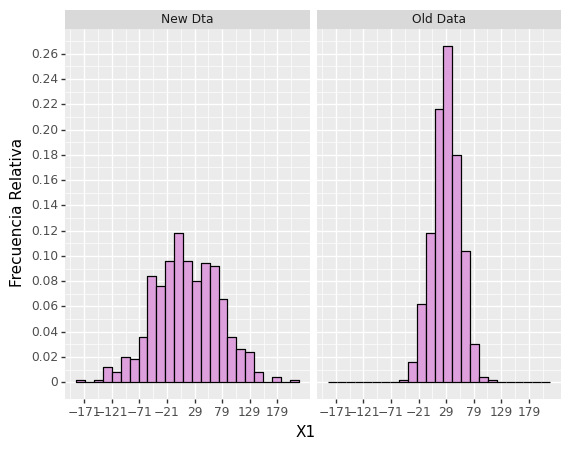

<ggplot: (96050426983)>

In [90]:
(
ggplot( df_Old_New_groups )
+  aes(x='X1' , y =  after_stat('width*density'))
+ geom_histogram(fill="plum", color="black", bins = 25)
+  labs(x = "X1", y = "Frecuencia Relativa")
+ scale_x_continuous( breaks = range(int(df_Old_New_groups['X1'].min()) , int(df_Old_New_groups['X1'].max()) , 50) ) 
+ scale_y_continuous( breaks = np.arange(0, 0.5, 0.02) )
+ facet_wrap('group')
)

In [91]:
Old_Data_Set.head()

,Y_old,X1_old,X2_old,X3_old
0,39.143694,48.800842,1.0,1.0
1,59.973454,31.741019,0.0,3.0
2,52.829785,23.363859,0.0,4.0
3,34.937053,53.239612,1.0,1.0
4,44.213997,61.520532,1.0,3.0


In [101]:
Boot_sample = []

In [102]:
for i in range(0, 100):

    Old_Data_Set.sample( n=len(Old_Data_Set) , random_state=i , replace=True )

IndexError: list assignment index out of range

## Bibliography

Resampling methods in Python https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html